In [1]:
import pandas as pd
import numpy as np

In [2]:
dfPrice = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\price_data.csv')

In [3]:
#Price EDA
print(dfPrice.head(1))

                                 id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  


In [4]:
# Check to see price_date's type
print(type(dfPrice['price_date'][0]))

# Transform price_date to a date for queries
print('Before:', type(dfPrice['price_date'][0]))
dfPrice['price_date'] = pd.to_datetime(dfPrice['price_date'])
print('After:', type(dfPrice['price_date'][0]))

<class 'str'>
Before: <class 'str'>
After: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
# Make sure Days are only on first of every month for consistency.
allFirst = True
for date in pd.unique(dfPrice['price_date']):
    if pd.to_datetime(date).day != 1:
        print(date)
        print('Not the first!')
        allFirst = False
        
if allFirst == True:
    print('All dates are on the first of every month.')
else:
    print('Some dates fall after the first of the month.')

All dates are on the first of every month.


In [6]:
# Check for duplicates input duplicates using ID and Date

dfPriceDups = dfPrice[dfPrice.duplicated(['id', 'price_date'])]
if len(dfPriceDups) == 0:
    print('There are no duplicates.')
else:
    print('Duplicates Found!')
    print(dfPriceDups)

There are no duplicates.


In [7]:
# Observe sample standard deviation of inputs at certain months
varList = []
for date in pd.unique(dfPrice['price_date']):
    print(str(date) + ':', len(dfPrice.loc[dfPrice['price_date'] == date]))
    varList.append(len(dfPrice.loc[dfPrice['price_date'] == date]))
    
print(np.std(varList, ddof = 1))

2015-01-01T00:00:00.000000000: 16070
2015-02-01T00:00:00.000000000: 16082
2015-03-01T00:00:00.000000000: 16074
2015-04-01T00:00:00.000000000: 16079
2015-05-01T00:00:00.000000000: 16080
2015-06-01T00:00:00.000000000: 16085
2015-07-01T00:00:00.000000000: 16090
2015-08-01T00:00:00.000000000: 16094
2015-09-01T00:00:00.000000000: 16082
2015-10-01T00:00:00.000000000: 16085
2015-11-01T00:00:00.000000000: 16087
2015-12-01T00:00:00.000000000: 16094
7.31747596821845


In [8]:
#Client EDA
dfClient = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\client_data.csv')
dfPrice = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\price_data.csv')

In [9]:
# Check for duplicate Client information
dfClientDups = dfClient[dfClient.duplicated(['id'])]
if len(dfClientDups) == 0:
    print('There are no duplicates.')
else:
    print('Duplicates Found!')
    print(dfClientDups)

There are no duplicates.


In [10]:
# Check Date datatype and format
print(type(dfClient['date_end'][0]))
print(dfClient['date_end'].head(1))

# Convert string to datetime
dfClient['date_end'] = pd.to_datetime(dfClient['date_end'])

<class 'str'>
0    2016-06-15
Name: date_end, dtype: object


In [11]:
#Check to see if all contracts end in 2016

all2016 = True
for date in pd.unique(dfClient['date_end']):
    if pd.to_datetime(date).year != 2016:
        all2016 = False
#         print(date)
#         print('Not 2016!')
if all2016 == True:
    print('All contract end dates are in 2016.')
else:
    print('One or more contracts do not end in 2016.')

One or more contracts do not end in 2016.


In [12]:
# Find clients with a contract ending from Jan 2016 - March 2016 (time period of churn)
mask = (dfClient['date_end'] > np.datetime64('2016-01-01')) & (dfClient['date_end'] <= np.datetime64('2016-03-31'))
dfContractEnds = dfClient.loc[mask]

# Find what percentage of these companies churned
allCompanies = len(dfContractEnds)
churnedCompanies = len(dfContractEnds.loc[dfContractEnds['churn'] == 1])

print( 'Between Jan 2016 and March 2016 ~' + str(round((churnedCompanies/allCompanies) * 100)) +  '% of companies who could churn did churn.')

Between Jan 2016 and March 2016 ~10% of companies who could churn did churn.


In [13]:
# Check to see if other clients churned despite being in a contract

# Find clients with a contract ending before Jan 2016 or after March 2016
mask = (dfClient['date_end'] < np.datetime64('2016-01-01')) | (dfClient['date_end'] > np.datetime64('2016-03-31'))
dfOutOfContract = dfClient.loc[mask]

# Find what percentage of these companies churned
countCan = len(dfOutOfContract)
countDid = len(dfOutOfContract.loc[dfOutOfContract['churn'] == 1])

print( 'Of the companies with contracts ending NOT between Jan 2016 and March 2016 ~' + str(round((countDid/countCan) * 100)) +  '% of companies who could churn did churn.')

Of the companies with contracts ending NOT between Jan 2016 and March 2016 ~10% of companies who could churn did churn.


In [14]:
# Note: Whether or not their contract ends at the time of their churn is likely a non-factor

In [15]:
# Next Step: Visualize Price/Time for readability, use colors to show churn/no churn
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Delete all client columns except for id and churn
dfClientChurn = dfClient[['id', 'churn']]

# Right Join all companies with their 2015 prices
dfGraph = pd.merge(dfClientChurn, dfPrice, on='id',how='outer')

# Check DF
print(dfGraph.head(1))

                                 id  churn  price_date  price_off_peak_var  \
0  24011ae4ebbe3035111d65fa7c15bc57    1.0  2015-01-01            0.125976   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103395            0.071536           40.565969       24.339581   

   price_mid_peak_fix  
0           16.226389  


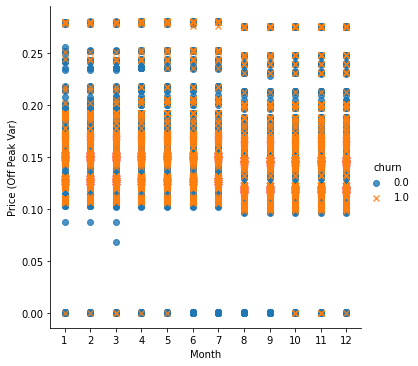

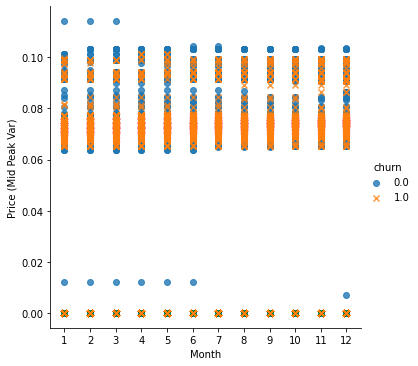

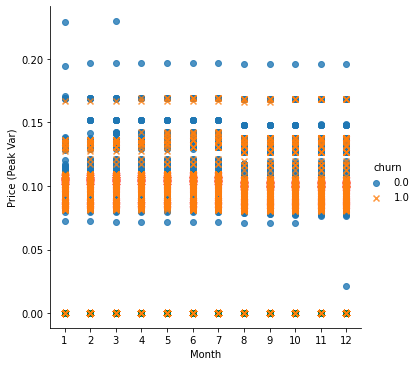

In [17]:
# Create Graphs visualizing relationship between price and churn (VAR)
xticks = [*range(1,13)]

# Off Peak Var
fig = sns.lmplot( x = 'price_date', y = 'price_off_peak_var', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig.set_axis_labels('Month', 'Price (Off Peak Var)')
fig.set_xticklabels(xticks)
# Mid Peak Var
fig2 = sns.lmplot( x = 'price_date', y = 'price_mid_peak_var', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig2.set_axis_labels('Month', 'Price (Mid Peak Var)')
fig2.set_xticklabels(xticks)
# Peak Var
fig3 = sns.lmplot( x = 'price_date', y = 'price_peak_var', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig3.set_axis_labels('Month', 'Price (Peak Var)')
fig3.set_xticklabels(xticks)

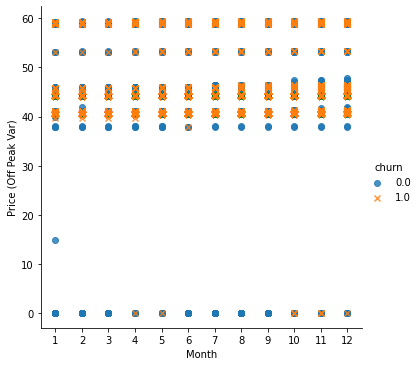

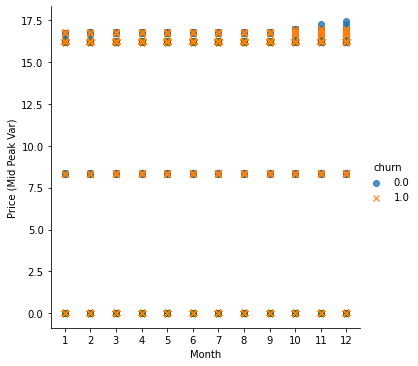

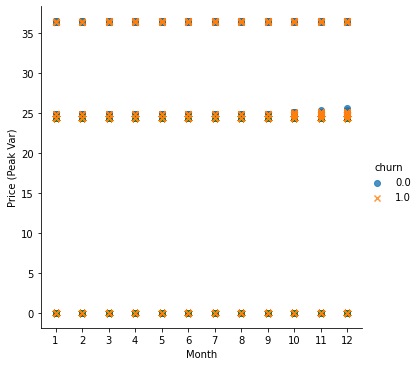

In [18]:
# Create Graphs visualizing relationship between price and churn (FIX)

# Off Peak Fix
fig = sns.lmplot( x = 'price_date', y = 'price_off_peak_fix', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig.set_axis_labels('Month', 'Price (Off Peak Var)')
fig.set_xticklabels(xticks)
# Mid Peak Fix
fig2 = sns.lmplot( x = 'price_date', y = 'price_mid_peak_fix', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig2.set_axis_labels('Month', 'Price (Mid Peak Var)')
fig2.set_xticklabels(xticks)
# Peak Fix
fig2 = sns.lmplot( x = 'price_date', y = 'price_peak_fix', data = dfGraph, fit_reg = False, hue = 'churn', legend = True, markers=["o", "x"])
fig2.set_axis_labels('Month', 'Price (Peak Var)')
fig2.set_xticklabels(xticks)